<a href="https://colab.research.google.com/github/airosa32/Data_Science__Case_04/blob/main/Regress%C3%A3o_para_o_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um modelo de Regressão para marketing**

## Contexto - Introdução
Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.


# **Imports**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Understading**
Loads do Raw Dataset e Previsualização dos dados para entende-lo

In [2]:
raw_df = pd.read_csv("/content/drive/MyDrive/DNC - Cursos/4 Curso Ciencias de Dados/1 CRISP - DM/Case Final/MKT.csv")


raw_df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


### **Análise de Outliers**

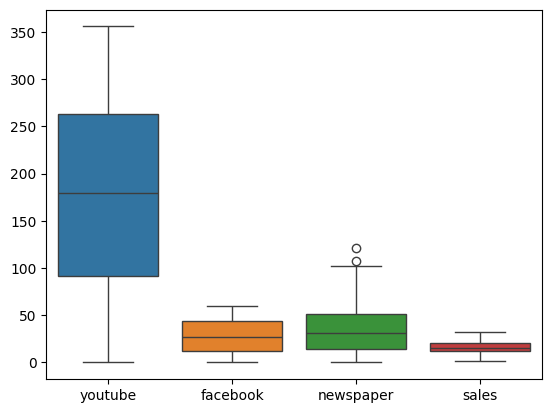

In [3]:
sns.boxplot(data=raw_df)
plt.show()

### **Análsie de Distribuição Normal**

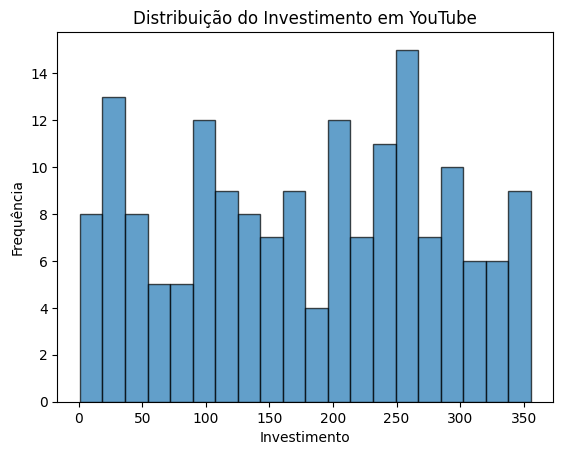

In [4]:
# Variável 'youtube'
plt.hist(raw_df['youtube'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição do Investimento em YouTube')
plt.xlabel('Investimento')
plt.ylabel('Frequência')
plt.show()

### **Análsie de Distribuição Normal**
 * Estimativa da densidade de probabilidade dos dados, e não os dados reais.

 * Quando a distribuição dos dados se aproxima de uma distribuição normal, isso implica que os dados seguem um padrão bem definido e previsível.

Bom para o nosso modelo !

<ipython-input-5-8a2d63864bb3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(raw_df['youtube'], shade=True)


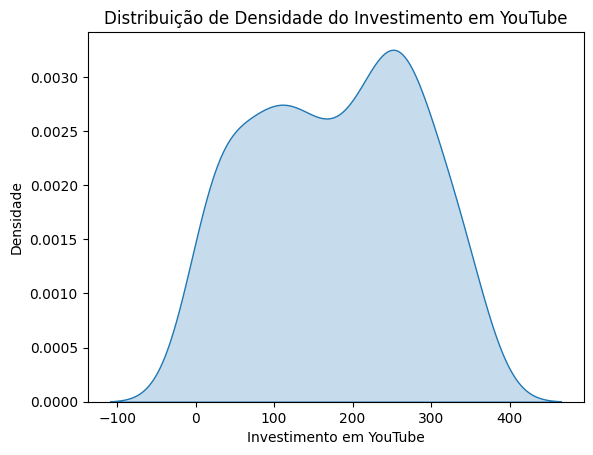

In [5]:
sns.kdeplot(raw_df['youtube'], shade=True)
plt.title('Distribuição de Densidade do Investimento em YouTube')
plt.xlabel('Investimento em YouTube')
plt.ylabel('Densidade')
plt.show()

### **Verificação de Colinearidade**

Coeficiente de Correlação: O coeficiente de correlação varia de -1 a 1.

  * +1: Correlação positiva perfeita. Quando uma variável aumenta, a outra também aumenta de forma proporcional.
    
  * -1: Correlação negativa perfeita. Quando uma variável aumenta, a outra diminui de forma proporcional.



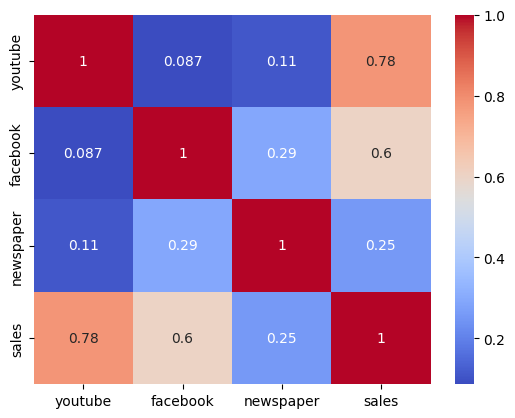

In [6]:
corr_matrix = raw_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

### **Pairplot**

Examina a relação entre todas as combinações possíveis de variáveis em um DataFrame, ajudando a identificar padrões, correlações e possíveis relações não lineares entre as variáveis.

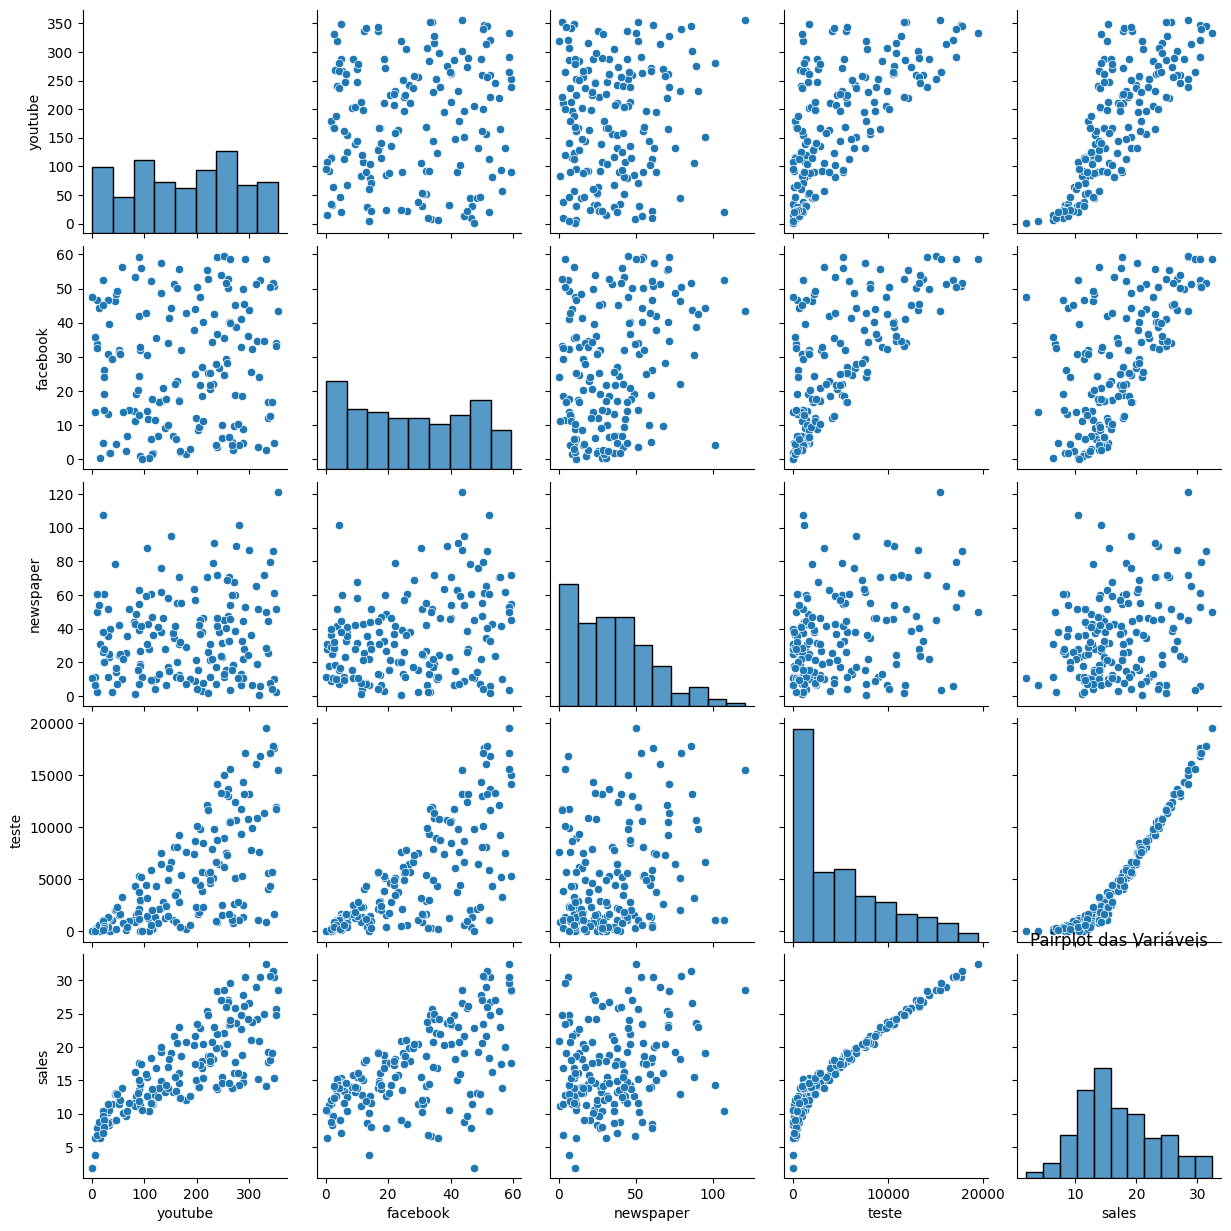

In [7]:
raw_df['teste'] = raw_df['youtube'] * raw_df['facebook']

# Define a nova ordem das colunas
new_order = ['youtube', 'facebook', 'newspaper', 'teste', 'sales']

# Reindexa o DataFrame para refletir a nova ordem das colunas
raw_df = raw_df[new_order]


sns.pairplot(raw_df)
plt.title('Pairplot das Variáveis')
plt.show()

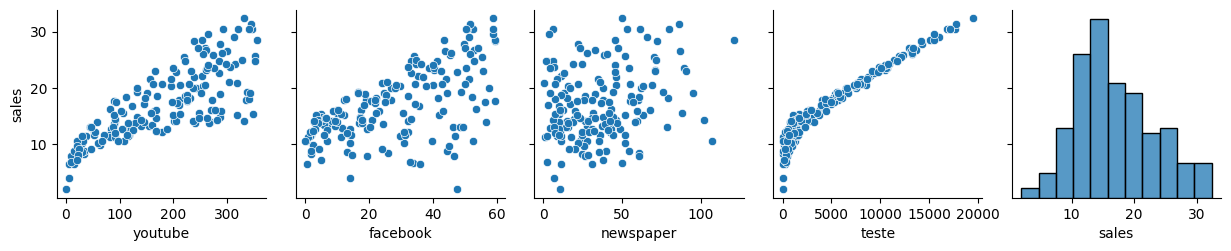

In [8]:
sns.pairplot(raw_df, x_vars = raw_df[0:-1], y_vars = "sales");

# Remove a coluna 'Teste' do DataFrame original
raw_df.drop('teste', axis=1, inplace=True)

# **Data Preparation**

### **Select Data**

In [9]:
# No caso iremos trabalhar com as 4 colunas

### **Clean Data**

In [10]:
raw_df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [11]:
# Vamos mudar o nome das colunas newspaper e sales
raw_df.rename({'newspaper': 'jornal', 'sales': 'vendas'}, axis=1, inplace=True)


raw_df.head(2)

,youtube,facebook,jornal,vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68


In [12]:
# Agora iremos ver se contem dados nulos e os tipos de dados de cada coluna
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   youtube   171 non-null    float64
 1   facebook  171 non-null    float64
 2   jornal    171 non-null    float64
 3   vendas    171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [13]:
# Utilizando um describe para entender melhor sobre os dados

'''
  Pela uma simples analise o maior investimento aplicado é pela
  plataforma do Youtube, e que o desvio padrão de vendas e bem
  baixo, assim sinalizando uma dado mais consistente.
'''
raw_df.describe()

,youtube,facebook,jornal,vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### **Construct Data**

In [14]:
# Criação de Variáveis Derivadas (Feature Engineering)
# Objetivo: Criar novas variáveis que possam ajudar o modelo a capturar padrões nos dados.
raw_df['youtube_facebook_interacao'] = raw_df['youtube'] * raw_df['facebook']

# Define a nova ordem das colunas
new_order = ['youtube', 'facebook', 'jornal', 'youtube_facebook_interacao', 'vendas']

# Reindexa o DataFrame para refletir a nova ordem das colunas
raw_df = raw_df[new_order]

### **Integrate Data**

In [15]:
df = raw_df


df.head(3)

,youtube,facebook,jornal,youtube_facebook_interacao,vendas
0,84.72,19.20,48.96,1626.6240,12.60
1,351.48,33.96,51.84,11936.2608,25.68
2,135.48,20.88,46.32,2828.8224,14.28


### Demais processos do data preparation não será nescessario
Format data já foi executado durante o processo.

# **Modeling**

### **Normalização ou Padronização:**

Objetivo: As variáveis apresentam escalas muito diferentes, normalizá-las ou padronizá-las pode melhorar a performance de modelos de regressão.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [17]:
scaler = StandardScaler()
df[['youtube', 'facebook', 'jornal', 'youtube_facebook_interacao']] = scaler.fit_transform(df[['youtube', 'facebook', 'jornal', 'youtube_facebook_interacao']])


df.head(3)

,youtube,facebook,jornal,youtube_facebook_interacao,vendas
0,-0.913377,-0.474304,0.552557,-0.705134,12.60
1,1.698087,0.352074,0.668546,1.397516,25.68
2,-0.416458,-0.380245,0.446234,-0.459946,14.28


### **Variáveis Explicativas - Para tentar explicar uma predição**

In [18]:
# X: Variavel que ira tentar explicar o que acontece na variação de Vendas
X_base = df['youtube_facebook_interacao'].values.reshape(-1, 1)


# Y: Variável Y será o Vendas, que será usada para fazer a predição da relação linear
Y_base = df["vendas"]

### **Separando os dados de treino e teste**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_base, Y_base, train_size = 0.7, test_size = 0.3, random_state = 42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 1)
(52, 1)
(119,)
(52,)


### **Treinando o modelo de ML para a Regressão Linear**

In [21]:
modelo = LinearRegression().fit(X_train, Y_train)

### **Fazendo o Predict**

In [22]:
y_predict = modelo.predict(X_test)

### **Analisando o predict para ver se teve um resultado esperado**

In [23]:
# Quanto maior o resultado do r2_score, maior a possibilidade de ter um acerto

# Vai de -1 a 1: Nesse caso temos uma linearidade muito alto nesse modelo
# No caso os dados estão bem correlacionados, as variavel X explica a Y ao longo do tempo
score = r2_score(Y_test, y_predict)
print(f"r2_score: {score}")

r2_score: 0.9332300522635104


### **Plotando no grafico o resultado real da base de dados e o do predict**

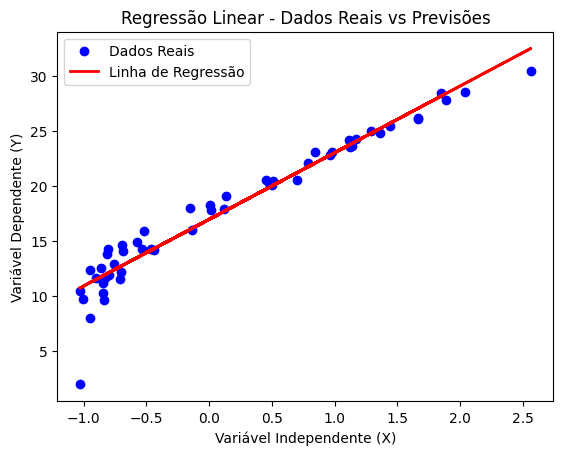

In [24]:
X_test = X_test.flatten()

# Plotar os dados reais
plt.scatter(X_test, Y_test, color='blue', label='Dados Reais')

# Plotar a linha de regressão
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Linha de Regressão')

plt.title('Regressão Linear - Dados Reais vs Previsões')
plt.xlabel('Variável Independente (X)')
plt.ylabel('Variável Dependente (Y)')
plt.legend()
plt.show()